## Import Libraries:

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 26.7 MB/s eta 0:00:00


**Keterangan**:

`!pip install ultralytics`: Perintah yang digunakan untuk menginstal library `ultralytics` menggunakan pip, yang merupakan package manager untuk Python. Tanda seru (!) di depan perintah menunjukkan bahwa ini adalah perintah shell yang dijalankan dari dalam notebook, seperti Jupyter Notebook atau Google Colab.

`Ultralytics`: Perusahaan yang mengembangkan YOLO (You Only Look Once), sebuah framework untuk object detection. YOLOv8 adalah versi terbaru dari framework tersebut, yang terkenal karena kecepatan dan akurasi deteksinya.

Berikut adalah langkah-langkah yang terjadi ketika menjalankan code tersebut:
- Package Manager: pip adalah package manager yang digunakan untuk menginstal dan mengelola paket dan dependensi Python.
- Install Ultralytics: Perintah install ultralytics akan mengunduh dan menginstal paket ultralytics dari Python Package Index (PyPI), bersama dengan semua dependensi yang diperlukan.
- Library Ultralytics ini biasanya digunakan untuk memudahkan pengguna dalam mengimplementasikan model YOLO (seperti YOLOv5, YOLOv8, dll) untuk tugas-tugas object detection dan computer vision lainnya.

In [2]:
import os # Library standar untuk berinteraksi dengan sistem operasi, seperti mengelola file dan direktori.
import shutil # Library standar untuk operasi tingkat tinggi pada file dan koleksi file, seperti menyalin dan menghapus.
import json # Library standar untuk bekerja dengan data JSON (JavaScript Object Notation).
import numpy as np # Library untuk komputasi numerik dengan dukungan array multidimensi dan berbagai fungsi matematika.
import pandas as pd # Library untuk manipulasi dan analisis data, terutama data dalam bentuk tabel (DataFrame).
import matplotlib.pyplot as plt # Submodule dari Matplotlib untuk membuat plot dan visualisasi data.
import matplotlib.image as img # Submodule dari Matplotlib untuk membaca dan menampilkan gambar.
import matplotlib.patches as patches # Submodule dari Matplotlib untuk membuat berbagai bentuk (seperti kotak atau lingkaran) pada plot.
import ultralytics # Library untuk bekerja dengan model YOLO (You Only Look Once) yang dikembangkan oleh Ultralytics untuk tugas deteksi objek.
import yaml # Library untuk membaca dan menulis file YAML (YAML Ain't Markup Language), sering digunakan untuk konfigurasi.

import warnings # Library standar untuk mengontrol peringatan yang muncul selama eksekusi program.
warnings.filterwarnings("ignore") # Menyembunyikan semua peringatan agar tidak mengganggu output program.

## Import Dataset:

In [3]:
with open('/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_val2017.json') as val_json:
    val_file = json.load(val_json)

with open('/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_train2017.json') as train_json:
    train_file = json.load(train_json)

Kode di atas digunakan untuk membaca file JSON yang berisi anotasi dataset COCO 2017 untuk data pelatihan (train) dan validasi (val). Berikut adalah penjelasan rinci dari masing-masing baris kode:

1. Membuka dan Membaca File JSON untuk Data Validasi:<br>
   a. with open('/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_val2017.json') as val_json: Membuka file instances_val2017.json yang berisi anotasi untuk data validasi dari dataset COCO 2017. File ini berada di direktori /kaggle/input/coco-2017-dataset/coco2017/annotations/.with open digunakan untuk memastikan bahwa file ditutup secara otomatis setelah blok with selesai dieksekusi.<br>
   b. val_file = json.load(val_json): Membaca konten file JSON dan memuatnya ke dalam variabel val_file sebagai dictionary Python.<br>
2. Membuka dan Membaca File JSON untuk Data Pelatihan<br>
   a. with open('/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_train2017.json') as train_json: Membuka file instances_train2017.json yang berisi anotasi untuk data pelatihan dari dataset COCO 2017. File ini juga berada di direktori yang sama dengan file anotasi validasi.with open digunakan untuk memastikan bahwa file ditutup secara otomatis setelah blok with selesai dieksekusi.<br>
   b. train_file = json.load(train_json): Membaca konten file JSON dan memuatnya ke dalam variabel train_file sebagai dictionary Python.

In [4]:
# Mengakses data dari file Validasi:
val_file.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [5]:
# Mengakses daftar Anotasi file Validasi:
annotations_val = val_file['annotations']
print(f"Jumlah anotasi pada data Validasi: {len(annotations_val)}")

Jumlah anotasi pada data Validasi: 36781


In [6]:
# Menghitung jumlah gambar dalam data Validasi:
num_images_val = len(val_file['images'])
print(f"Jumlah gambar pada data validasi: {num_images_val}")

Jumlah gambar pada data validasi: 5000


In [7]:
# Mengakses data dari file pelatihan (train):
train_file.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [8]:
# Mengakses daftar Anotasi file pelatihan (train):
annotations_train = train_file['annotations']
print(f"Jumlah anotasi pada data Pelatihan: {len(annotations_train)}")

Jumlah anotasi pada data Pelatihan: 860001


In [9]:
# Menghitung jumlah gambar dalam data pelatihan (train):
num_images_train = len(train_file['images'])
print(f"Jumlah gambar pada data pelatihan: {num_images_train}")

Jumlah gambar pada data pelatihan: 118287


In [10]:
# Melihat kunci (keys) dari elemen pertama dalam daftar images dari val_file:
val_file['images'][0].keys()

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])

In [11]:
# Melihat kunci (keys) dari elemen pertama dalam daftar images dari train_file:
train_file['images'][0].keys()

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])

In [12]:
# Melihat seluruh konten dari elemen pertama dalam daftar images dari val_file:
val_file['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

**Keterangan**:

- `license`: Nomor lisensi yang menunjukkan izin penggunaan gambar.
- `file_name`: Nama file gambar di dataset.
- `coco_url`: URL gambar di situs COCO dataset.
- `height`: Tinggi gambar dalam piksel.
- `width`: Lebar gambar dalam piksel.
- `date_captured`: Tanggal dan waktu gambar diambil.
- `flickr_url`: URL gambar di situs Flickr.
- `id`: ID unik untuk gambar dalam dataset.

In [13]:
# Melihat kunci (keys) dari elemen pertama dalam daftar annotations dari val_file:
val_file['annotations'][0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

**Keterangan**:

- `segmentation`: Informasi segmentasi objek (biasanya digunakan untuk instance segmentation).
- `area`: Luas dari objek yang dianotasi dalam piksel.
- `iscrowd`: Menunjukkan apakah anotasi ini adalah untuk objek yang ramai (crowd)
- `image_id`: ID gambar yang berhubungan dengan anotasi ini.
- `bbox`: Bounding box objek, biasanya dalam format [x, y, width, height].
- `category_id`: ID kategori objek yang dianotasi.
- `id`: ID unik untuk anotasi.

In [14]:
# Melihat kunci (keys) dari elemen pertama dalam daftar annotations dari train_file:
train_file['annotations'][0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [15]:
# Melihat seluruh konten dari elemen pertama dalam daftar annotations dari val_file:
val_file['annotations'][0]

{'segmentation': [[510.66,
   423.01,
   511.72,
   420.03,
   510.45,
   416.0,
   510.34,
   413.02,
   510.77,
   410.26,
   510.77,
   407.5,
   510.34,
   405.16,
   511.51,
   402.83,
   511.41,
   400.49,
   510.24,
   398.16,
   509.39,
   397.31,
   504.61,
   399.22,
   502.17,
   399.64,
   500.89,
   401.66,
   500.47,
   402.08,
   499.09,
   401.87,
   495.79,
   401.98,
   490.59,
   401.77,
   488.79,
   401.77,
   485.39,
   398.58,
   483.9,
   397.31,
   481.56,
   396.35,
   478.48,
   395.93,
   476.68,
   396.03,
   475.4,
   396.77,
   473.92,
   398.79,
   473.28,
   399.96,
   473.49,
   401.87,
   474.56,
   403.47,
   473.07,
   405.59,
   473.39,
   407.71,
   476.68,
   409.41,
   479.23,
   409.73,
   481.56,
   410.69,
   480.4,
   411.85,
   481.35,
   414.93,
   479.86,
   418.65,
   477.32,
   420.03,
   476.04,
   422.58,
   479.02,
   422.58,
   480.29,
   423.01,
   483.79,
   419.93,
   486.66,
   416.21,
   490.06,
   415.57,
   492.18,
   416.85,

In [16]:
# Melihat kunci (keys) dari elemen pertama dalam daftar categories dari val_file:
val_file['categories'][0].keys()

dict_keys(['supercategory', 'id', 'name'])

**Keterangan**:

- `supercategory`: Kategori umum yang lebih tinggi dari kategori ini.
- `id`: ID unik untuk kategori.
- `name`: Nama kategori.

In [17]:
# Melihat seluruh konten dari daftar categories dalam val_file:
val_file['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

## Data Preprocessing and Preparation:

In [18]:
val_anno_df = [] # Membuat list kosong untuk menampung data anotasi

# Iterasi melalui setiap anotasi dalam val_file:
for x in range(len(val_file['annotations'])):
    val_anno_df.append([val_file['annotations'][x]['image_id'], 
                        val_file['annotations'][x]['bbox'], 
                        val_file['annotations'][x]['iscrowd'],
                        val_file['annotations'][x]['category_id'], 
                        val_file['annotations'][x]['id']
                       ])
    
# Membuat DataFrame dari list yang telah dibuat:
val_anno_df = pd.DataFrame(val_anno_df, columns = ['image_id', 'bbox', 'iscrowd', 'category_id', 'id'])

# Menampilkan 5 baris pertama dari DataFrame:
val_anno_df.head()

image_id                              bbox  iscrowd  category_id    id
0    289343    [473.07, 395.93, 38.65, 28.67]        0           18  1768
1     61471   [272.1, 200.23, 151.97, 279.77]        0           18  1773
2    472375  [124.71, 196.18, 372.85, 356.81]        0           18  2551
3    520301  [112.71, 154.82, 367.29, 479.35]        0           18  3186
4    579321   [200.61, 89.65, 400.22, 251.02]        0           18  3419

In [19]:
val_im_df = [] # Membuat list kosong untuk menampung data gambar

# Iterasi melalui setiap gambar dalam val_file:
for x in range(len(val_file['images'])):
    val_im_df.append([
        val_file['images'][x]['id'], 
        val_file['images'][x]['file_name'], 
        val_file['images'][x]['height'], 
        val_file['images'][x]['width'
                    ]])
# Membuat DataFrame dari list yang telah dibuat:
val_im_df = pd.DataFrame(val_im_df, columns = ['image_id', 'file_name', 'height', 'width'])

# Menampilkan 5 baris pertama dari DataFrame:
val_im_df.head()

image_id         file_name  height  width
0    397133  000000397133.jpg     427    640
1     37777  000000037777.jpg     230    352
2    252219  000000252219.jpg     428    640
3     87038  000000087038.jpg     480    640
4    174482  000000174482.jpg     388    640

In [20]:
# Menggabungkan DataFrame val_anno_df (yang berisi informasi anotasi) yang hanya mengandung Person (1)
# dengan DataFrame val_im_df (yang berisi informasi gambar) berdasarkan kolom image_id
val_df = pd.merge(val_anno_df[val_anno_df['category_id'] == 1], val_im_df, how = 'inner', on = 'image_id')

# Mengurutkan data berdasarkan nama file gambar dan ditampilkan lima baris pertama:
val_df.sort_values('file_name').head()

image_id                              bbox  iscrowd  category_id  \
7221       139    [384.43, 172.21, 15.12, 35.74]        0            1   
7217       139    [412.8, 157.61, 53.05, 138.01]        0            1   
4875       785    [280.79, 44.73, 218.7, 346.68]        0            1   
8830       872  [145.26, 100.67, 291.95, 457.35]        0            1   
8834       872   [163.73, 126.42, 265.69, 480.4]        0            1   

          id         file_name  height  width  
7221  233201  000000000139.jpg     426    640  
7217  230831  000000000139.jpg     426    640  
4875  442619  000000000785.jpg     425    640  
8830  559508  000000000872.jpg     640    621  
8834  560228  000000000872.jpg     640    621

In [21]:
# Menghitung jumlah nilai unik dalam kolom image_id dari DataFrame val_df:
val_df.image_id.nunique()

2693

In [22]:
train_anno_df = [] # Membuat list kosong untuk menampung data anotasi pelatihan (train)

# Iterasi melalui setiap anotasi dalam train_file:
for x in range(len(train_file['annotations'])):
    train_anno_df.append([
        train_file['annotations'][x]['image_id'], 
        train_file['annotations'][x]['bbox'], 
        train_file['annotations'][x]['iscrowd'],
        train_file['annotations'][x]['category_id'], 
        train_file['annotations'][x]['id']
    ])
    
# Membuat DataFrame dari list yang telah dibuat:
train_anno_df = pd.DataFrame(train_anno_df, columns = ['image_id', 'bbox', 'iscrowd', 'category_id', 'id'])

# Menampilkan 5 baris pertama dari DataFrame:
train_anno_df.head()

image_id                             bbox  iscrowd  category_id    id
0    558840   [199.84, 200.46, 77.71, 70.88]        0           58   156
1    200365  [234.22, 317.11, 149.39, 38.55]        0           58   509
2    200365   [239.48, 347.87, 160.0, 57.81]        0           58   603
3    200365      [296.65, 388.33, 1.03, 0.0]        0           58   918
4    200365  [251.87, 333.42, 125.94, 22.71]        0           58  1072

In [23]:
train_im_df = [] # Membuat list kosong untuk menampung data gambar pelatihan

# Iterasi melalui setiap gambar dalam train_file:
for x in range(len(train_file['images'])):
    train_im_df.append([
        train_file['images'][x]['id'], 
        train_file['images'][x]['file_name'], 
        train_file['images'][x]['height'], 
        train_file['images'][x]['width']
    ])

# Membuat DataFrame dari list yang telah dibuat:
train_im_df = pd.DataFrame(train_im_df, columns = ['image_id', 'file_name', 'height', 'width'])

# Menampilkan 5 baris pertama dari DataFrame:
train_im_df.head()

image_id         file_name  height  width
0    391895  000000391895.jpg     360    640
1    522418  000000522418.jpg     480    640
2    184613  000000184613.jpg     336    500
3    318219  000000318219.jpg     640    556
4    554625  000000554625.jpg     640    426

In [24]:
'''
menggabungkan DataFrame train_anno_df (yang berisi informasi anotasi) 
dengan DataFrame train_im_df (yang berisi informasi gambar) 
berdasarkan kolom image_id, hanya untuk anotasi yang memiliki category_id 
sama dengan 1 (kategori untuk "person" dalam dataset COCO)
'''
train_df = pd.merge(train_anno_df[train_anno_df['category_id'] == 1], train_im_df, how = 'inner', on = 'image_id')

# Menampilkan 5 baris pertama dari DataFrame:
train_df.head()

image_id                             bbox  iscrowd  category_id      id  \
0    537548  [267.03, 104.32, 229.19, 320.0]        0            1  183020   
1    117891   [206.77, 1.44, 433.23, 408.73]        0            1  183030   
2    120021    [276.12, 0.29, 61.18, 118.73]        0            1  183050   
3    403255   [355.87, 118.43, 30.84, 42.87]        0            1  183057   
4    209468  [178.38, 120.54, 114.59, 354.6]        0            1  183062   

          file_name  height  width  
0  000000537548.jpg     480    640  
1  000000117891.jpg     427    640  
2  000000120021.jpg     480    640  
3  000000403255.jpg     384    640  
4  000000209468.jpg     480    640

In [25]:
# Menghitung jumlah nilai unik dalam kolom image_id dari DataFrame train_df:
train_df.image_id.nunique()

64115

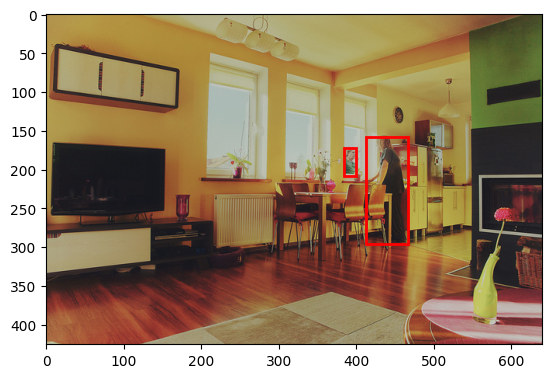

In [26]:
# Gambar yang ingin ditampilkan:
opened_im = '000000000139.jpg'#'000000000872.jpg'
# Path menuju direktori tempat gambar berada:
image_path = '/kaggle/input/coco-2017-dataset/coco2017/val2017'
# Membaca gambar menggunakan matplotlib.image.imread:
image = img.imread(os.path.join(image_path, opened_im))
# Membuat plot:
fig, ax = plt.subplots()
# Menampilkan gambar:
plt.imshow(image)

# Menggambar bounding box untuk setiap anotasi yang sesuai dengan file gambar terbuka:
for bbox in val_df[val_df["file_name"] == opened_im]['bbox']:
    x, y, w, h = bbox  # Mengambil koordinat dan ukuran bounding box
    rect = patches.Rectangle((x, y), w, h, fill = False, color = 'red', linewidth = 2)
    ax.add_patch(rect)  # Menambahkan patch bounding box ke plot

# Menampilkan plot untuk melihat gambar dengan bounding box yang telah ditambahkan:
plt.show()

## Folders Preparation:

In [27]:
# Membuat direktori untuk data pelatihan dan validasi:
os.makedirs('/kaggle/working/COCOPerson/train/images') # Direktori untuk menyimpan gambar pelatihan.
os.makedirs('/kaggle/working/COCOPerson/train/labels') # Direktori untuk menyimpan label atau anotasi pelatihan.
os.makedirs('/kaggle/working/COCOPerson/validation/images') # Direktori untuk menyimpan gambar validasi.
os.makedirs('/kaggle/working/COCOPerson/validation/labels') # Direktori untuk menyimpan label atau anotasi validasi.

In [28]:
# Menentukan direktori awal dan target:
init_val_dir = '/kaggle/input/coco-2017-dataset/coco2017/val2017'
target_val_dir = '/kaggle/working/COCOPerson/validation'

# Mendapatkan daftar nama file gambar yang unik dari val_df:
val_image_list = list(set(val_df["file_name"]))
val_image_list.sort()

# Mengambil 1000 gambar pertama:
for img_filename in val_image_list[:1000]:
    # Menyalin gambar ke direktori target:
    shutil.copy(os.path.join(init_val_dir, img_filename), os.path.join(target_val_dir, "images", img_filename))
    
    # Membuat file label untuk gambar:
    with open(os.path.join(target_val_dir, "labels", "{}.txt".format(img_filename[:-4])), 'w') as f:
        # Iterasi melalui setiap bbox pada gambar yang sesuai:
        for i in range(len(val_df[val_df["file_name"] == img_filename]['bbox'])):
            x, y, w, h = val_df[val_df["file_name"] == img_filename]['bbox'].iloc[i]
            im_height = val_df[val_df["file_name"] == img_filename]['height'].iloc[i]
            im_width = val_df[val_df["file_name"] == img_filename]['width'].iloc[i]
            # Menulis label dalam format YOLO:
            f.write("0 {} {} {} {}\n".format((x + 0.5 * w) / im_width, (y + 0.5 * h) / im_height, w / im_width, h / im_height))

In [29]:
# Mendapatkan daftar nama file gambar yang unik dari train_df:
train_image_list = list(set(train_df["file_name"]))
train_image_list.sort()

# Direktori awal dan target:
init_train_dir = '/kaggle/input/coco-2017-dataset/coco2017/train2017'
target_train_dir = '/kaggle/working/COCOPerson/train'

# Mengambil 7500 gambar pertama:
for img_filename in train_image_list[:7500]:
    # Menyalin gambar ke direktori target:
    shutil.copy(os.path.join(init_train_dir, img_filename), os.path.join(target_train_dir, "images", img_filename))
    
     # Membuat file label untuk gambar:
    with open(os.path.join(target_train_dir, "labels", "{}.txt".format(img_filename[:-4])), 'w') as f:
        # Iterasi melalui setiap bbox pada gambar yang sesuai:
        for i in range(len(train_df[train_df["file_name"] == img_filename]['bbox'])):
            x, y, w, h = train_df[train_df["file_name"] == img_filename]['bbox'].iloc[i]
            im_height = train_df[train_df["file_name"] == img_filename]['height'].iloc[i]
            im_width = train_df[train_df["file_name"] == img_filename]['width'].iloc[i]
            # Menulis label dalam format YOLO:
            f.write("0 {} {} {} {}\n".format((x + 0.5 * w) / im_width, (y + 0.5 * h) / im_height, w / im_width, h / im_height))

In [30]:
# Path untuk dataset train dan validation:
train_path = '/kaggle/working/COCOPerson/train'
val_path = '/kaggle/working/COCOPerson/validation'

# Menulis konfigurasi ke file YAML:
with open("/kaggle/working/COCOPerson/data.yaml", "w") as file:
    yaml.dump({
        "train": train_path,
        "val": val_path,
        "nc": 1,  # Jumlah kelas (hanya 'person' dalam kasus ini)
        "names": ['person']  # Nama kelas
    }, file, default_flow_style = False)

## Memuat Model Pre-trained:
dalam kasus ini ingin menguji model YOLOv8m tanpa perlu melakukan train ulang, sehingga akan langsung diimplementasikan untuk gambar maupun video.

In [31]:
from ultralytics import YOLO

# Muat model yang sudah dilatih sebelumnya (yolov8m.pt):
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 217MB/s] 


## Predict:

#### 1. Deteksi pada Gambar:

In [32]:
import cv2 

In [33]:
# Memuat model yang sudah dilatih sebelumnya (yolov8m.pt):
model = YOLO('/kaggle/input/yolov8m-pretrain-without-train/other/coco2017datasetpersontracking/1/yolov8m.pt')
test_img_name_list = os.listdir('/kaggle/input/coco-2017-dataset/coco2017/test2017')[:20]
test_img_list = [os.path.join('/kaggle/input/coco-2017-dataset/coco2017/test2017', i) for i in test_img_name_list]

In [34]:
# Output directory:
output_img_dir = '/kaggle/working/yolov8m_no_train_images'
os.makedirs(output_img_dir, exist_ok = True)

In [35]:
# Melakukan prediksi dan menyimpan gambar hasil deteksi:
for img_path in test_img_list:
    img = cv2.imread(img_path)
    results = model(img)
    
    for result in results:
        if result.boxes is not None:
            person_boxes = result.boxes[result.boxes.cls == 0]
            if person_boxes.shape[0] > 0:
                for box in person_boxes:
                    x1, y1, x2, y2 = [int(coord) for coord in box.xyxy.cpu().numpy()[0]]
                    confidence = box.conf.cpu().numpy()[0]
                    # Menggambar bounding box pada gambar:
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(img, f'person {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Menyimpan gambar hasil deteksi:
    output_img_path = os.path.join(output_img_dir, os.path.basename(img_path))
    cv2.imwrite(output_img_path, img)


0: 480x640 1 bench, 83.2ms
Speed: 6.7ms preprocess, 83.2ms inference, 242.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 3 cars, 1 motorcycle, 1 truck, 1 kite, 28.2ms
Speed: 2.0ms preprocess, 28.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 3 forks, 2 knifes, 1 pizza, 84.8ms
Speed: 1.2ms preprocess, 84.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

0: 640x448 2 persons, 2 scissorss, 86.6ms
Speed: 5.1ms preprocess, 86.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)

0: 352x640 2 persons, 1 sandwich, 82.0ms
Speed: 2.0ms preprocess, 82.0ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)

0: 448x640 4 persons, 1 airplane, 27.9ms
Speed: 2.1ms preprocess, 27.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 640x448 2 persons, 1 cell phone, 28.0ms
Speed: 1.8ms preprocess, 28.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)

0: 

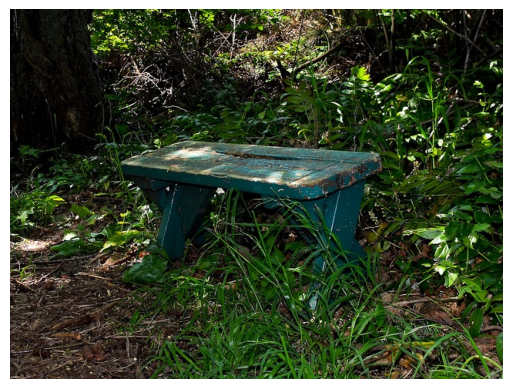

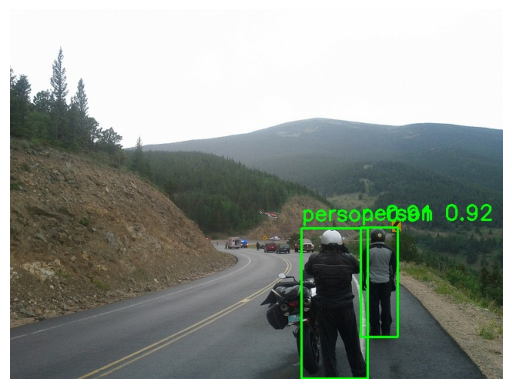

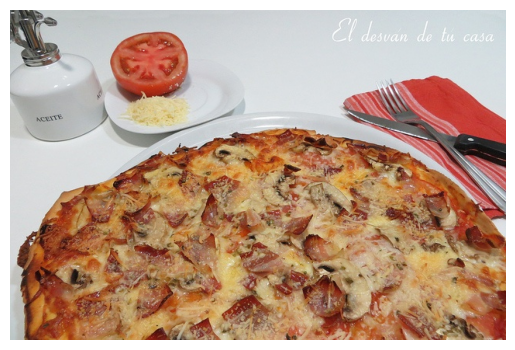

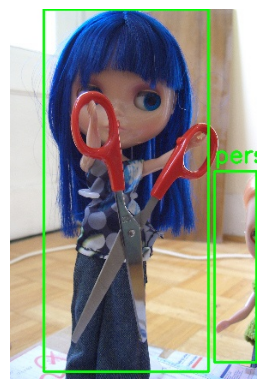

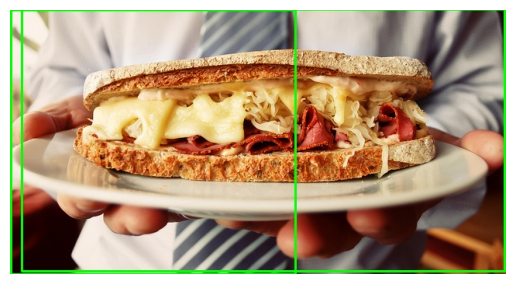

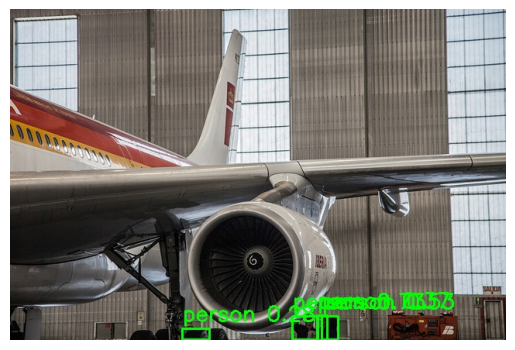

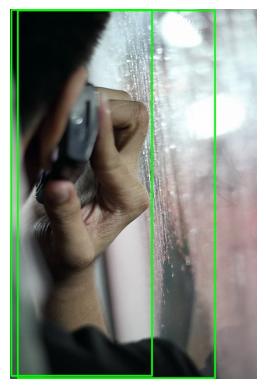

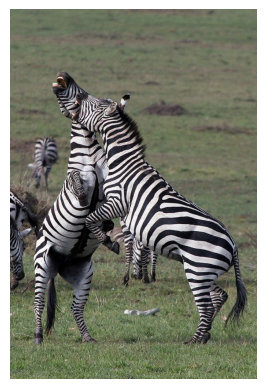

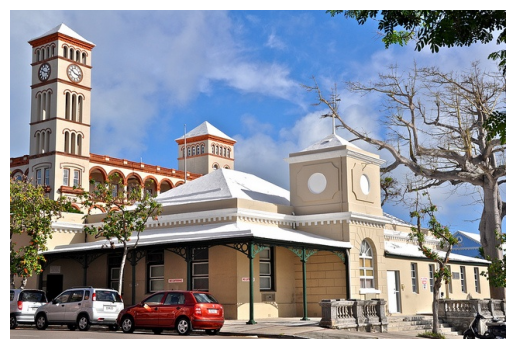

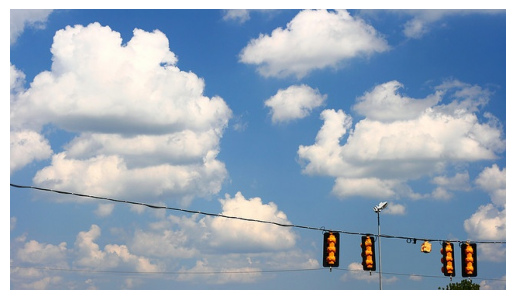

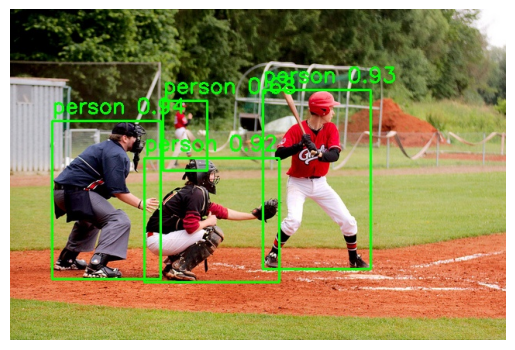

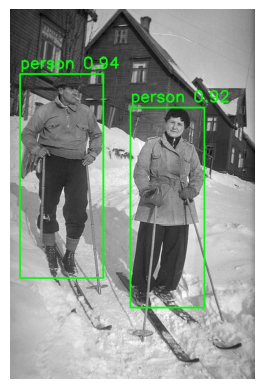

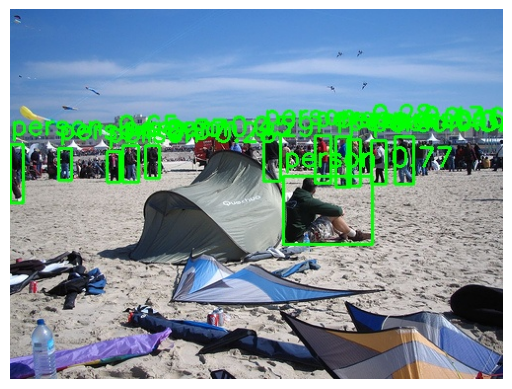

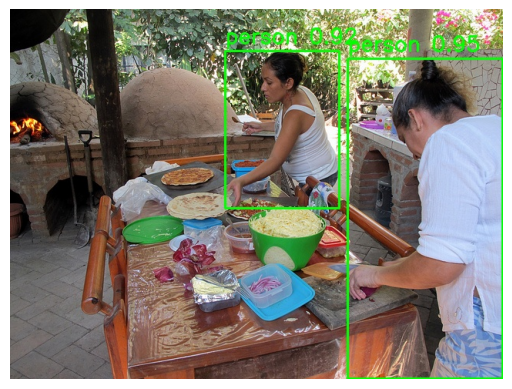

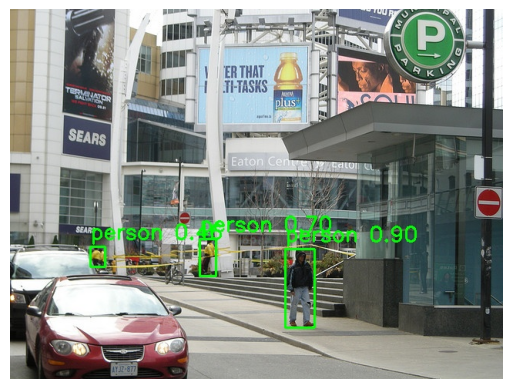

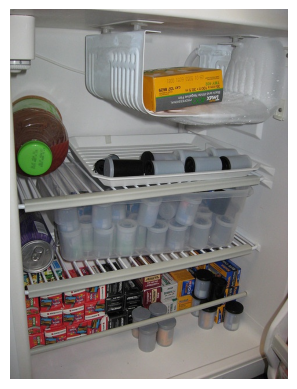

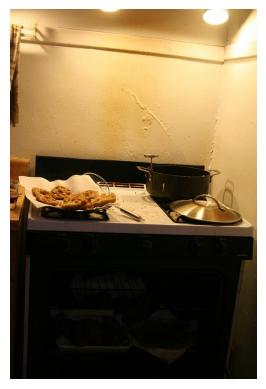

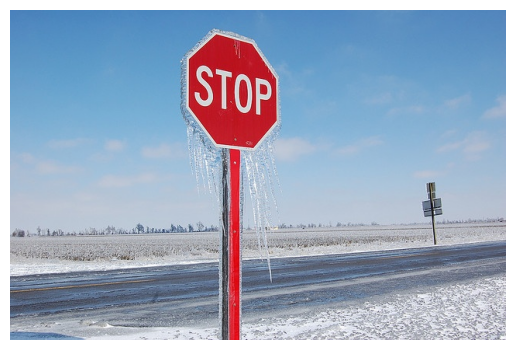

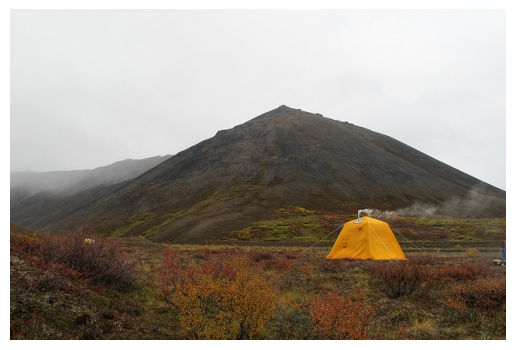

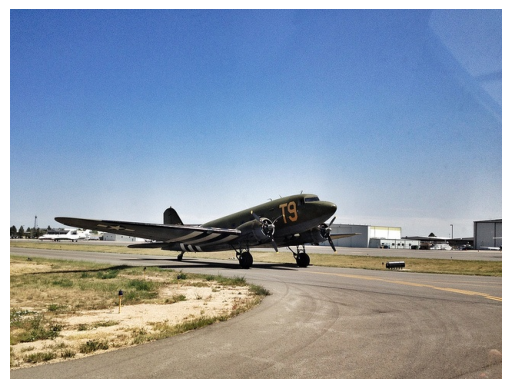

In [36]:
# Menampilkan hasil deteksi pada gambar:
for img_path in test_img_list:
    img = cv2.imread(os.path.join(output_img_dir, os.path.basename(img_path)))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

#### 2. Deteksi pada Video:

#### Video 1:

In [65]:
# Memuat model yang sudah dilatih sebelumnya (yolov8m.pt):
model = YOLO('/kaggle/input/yolov8m-pretrain-without-train/other/coco2017datasetpersontracking/1/yolov8m.pt')

In [66]:
# Path video yang akan dideteksi:
video_path = '/kaggle/input/video-for-person-tracking/vecteezy_shopping-street-in-zurich-switzerland_3362832.mov'
output_dir = '/kaggle/working/'  # Direktori untuk menyimpan hasil video

In [67]:
# Membaca video:
cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(os.path.join(output_dir, 'yolov8m_results.mp4'), fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Prediksi pada frame saat ini:
    results = model.predict(frame)
    
    # Filter hasil deteksi untuk class 'person' saja (class ID 0):
    for result in results:
        if result.boxes is not None:
            person_boxes = result.boxes[result.boxes.cls == 0]
            if person_boxes.shape[0] > 0:
                for box in person_boxes:
                    x1, y1, x2, y2 = [int(coord) for coord in box.xyxy.cpu().numpy()[0]]
                    confidence = box.conf.cpu().numpy()[0]
                    # Menggambar bounding box pada frame:
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(frame, f'person {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Menulis frame yang telah diproses ke video output:
    out.write(frame)

cap.release()
out.release()

print(f"Video hasil deteksi disimpan di: {os.path.join(output_dir, 'yolov8m_results.mp4')}")


0: 384x640 13 persons, 2 bicycles, 1 bus, 26.0ms
Speed: 2.5ms preprocess, 26.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 3 bicycles, 1 bus, 25.3ms
Speed: 3.1ms preprocess, 25.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 2 bicycles, 1 bus, 25.4ms
Speed: 2.4ms preprocess, 25.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 3 bicycles, 1 bus, 25.3ms
Speed: 3.3ms preprocess, 25.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 2 bicycles, 1 bus, 25.3ms
Speed: 3.2ms preprocess, 25.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 2 bicycles, 1 bus, 25.3ms
Speed: 3.0ms preprocess, 25.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 3 bicycles, 1 bus, 25.3ms
Speed: 3.3ms preprocess, 25.3ms inference, 1.6ms postprocess per ima

#### Video 2:

In [68]:
# Memuat model yang sudah dilatih sebelumnya (yolov8m.pt):
model = YOLO('/kaggle/input/yolov8m-pretrain-without-train/other/coco2017datasetpersontracking/1/yolov8m.pt')

In [69]:
# Path video yang akan dideteksi:
video2_path = '/kaggle/input/video-for-person-tracking/video.mp4'
output_dir = '/kaggle/working/'  # Direktori untuk menyimpan hasil video

In [70]:
# Membaca video:
cap = cv2.VideoCapture(video2_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(os.path.join(output_dir, 'yolov8m_video2_results.mp4'), fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Prediksi pada frame saat ini:
    results = model.predict(frame)
    
    # Filter hasil deteksi untuk class 'person' saja (class ID 0):
    for result in results:
        if result.boxes is not None:
            person_boxes = result.boxes[result.boxes.cls == 0]
            if person_boxes.shape[0] > 0:
                for box in person_boxes:
                    x1, y1, x2, y2 = [int(coord) for coord in box.xyxy.cpu().numpy()[0]]
                    confidence = box.conf.cpu().numpy()[0]
                    # Menggambar bounding box pada frame:
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(frame, f'person {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Menulis frame yang telah diproses ke video output:
    out.write(frame)

cap.release()
out.release()

print(f"Video hasil deteksi disimpan di: {os.path.join(output_dir, 'yolov8m_video2_results.mp4')}")


0: 384x640 10 persons, 2 cars, 1 traffic light, 2 backpacks, 1 handbag, 1 cup, 25.9ms
Speed: 2.0ms preprocess, 25.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 2 cars, 1 traffic light, 2 backpacks, 1 handbag, 1 cup, 25.2ms
Speed: 2.1ms preprocess, 25.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 2 cars, 1 traffic light, 2 backpacks, 1 handbag, 1 cup, 25.3ms
Speed: 3.0ms preprocess, 25.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 car, 1 motorcycle, 1 traffic light, 2 backpacks, 1 cup, 25.2ms
Speed: 2.2ms preprocess, 25.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 1 car, 2 traffic lights, 2 backpacks, 2 handbags, 1 cup, 25.3ms
Speed: 2.2ms preprocess, 25.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 car, 1 traffic light, 2 backpacks, 2 handbags, 1 cu

## Validation:

#### Validasi Gambar:

Dengan Gambar dari Luar Dataset COCO 2017:

In [71]:
# Memuat model yang sudah dilatih sebelumnya (yolov8m.pt):
model = YOLO('/kaggle/input/yolov8m-pretrain-without-train/other/coco2017datasetpersontracking/1/yolov8m.pt')

In [72]:
# Path untuk dataset baru:
new_img_dir = '/kaggle/input/images-for-person-tracking'
new_img_name_list = os.listdir(new_img_dir)[:2]
new_img_list = [os.path.join(new_img_dir, i) for i in new_img_name_list]

In [73]:
# Output directory:
output_new_img_dir = '/kaggle/working/yolov8_new_images'
os.makedirs(output_new_img_dir, exist_ok = True)

In [74]:
# Melakukan prediksi dan menyimpan gambar hasil deteksi:
for img_path in new_img_list:
    img = cv2.imread(img_path)
    results = model(img)
    
    for result in results:
        if result.boxes is not None:
            person_boxes = result.boxes[result.boxes.cls == 0]
            if person_boxes.shape[0] > 0:
                for box in person_boxes:
                    x1, y1, x2, y2 = [int(coord) for coord in box.xyxy.cpu().numpy()[0]]
                    confidence = box.conf.cpu().numpy()[0]
                    # Menggambar bounding box pada gambar:
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(img, f'person {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Menyimpan gambar hasil deteksi:
    output_img_path = os.path.join(output_new_img_dir, os.path.basename(img_path))
    cv2.imwrite(output_img_path, img)


0: 640x448 6 persons, 2 backpacks, 28.0ms
Speed: 3.0ms preprocess, 28.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)

0: 448x640 2 persons, 2 backpacks, 28.1ms
Speed: 3.0ms preprocess, 28.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


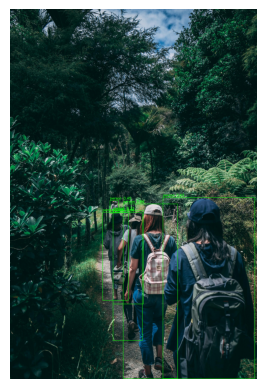

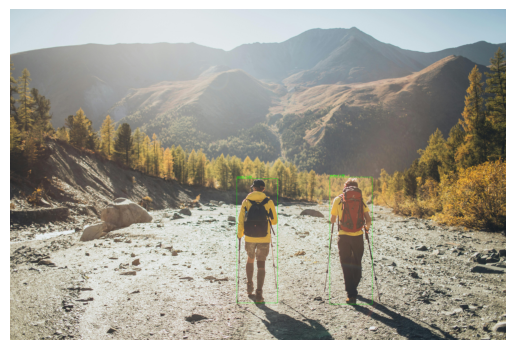

In [75]:
# Menampilkan hasil deteksi pada gambar:
for img_path in new_img_list:
    img = cv2.imread(os.path.join(output_new_img_dir, os.path.basename(img_path)))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()